In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [18]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Preprocessing
X = titanic_data[['Parch','Embarked','Pclass', 'Sex', 'Age', 'Fare']].copy()
y = titanic_data['Survived'].copy()

# Convert categorical features to one-hot encoding
X['Sex'] = pd.Categorical(X['Sex'])
X['Sex'] = X['Sex'].cat.codes

In [19]:
X['Embarked'] = pd.Categorical(X['Embarked'].fillna('U')).codes

In [20]:
# Fill missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)

# Normalize numerical features
scaler = StandardScaler()
X[['Age', 'Fare', 'Parch']] = scaler.fit_transform(X[['Age', 'Fare', 'Parch']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define the graph model
# Categorical inputs
cat_input_1 = Input(shape=(1,))
embedding_1 = Embedding(input_dim=2, output_dim=2)(cat_input_1)
flat_embed_1 = Flatten()(embedding_1)

cat_input_2 = Input(shape=(1,))
embedding_2 = Embedding(input_dim=4, output_dim=2)(cat_input_2)
flat_embed_2 = Flatten()(embedding_2)

# Numerical inputs
num_input = Input(shape=(4,))

# Concatenate categorical embeddings with numerical inputs
concatenated = Concatenate()([flat_embed_1, flat_embed_2, num_input])

# Dense layers for classification
x = Dense(16, activation='relu')(concatenated)
x = Dense(8, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=[cat_input_1, cat_input_2, num_input], outputs=outputs)


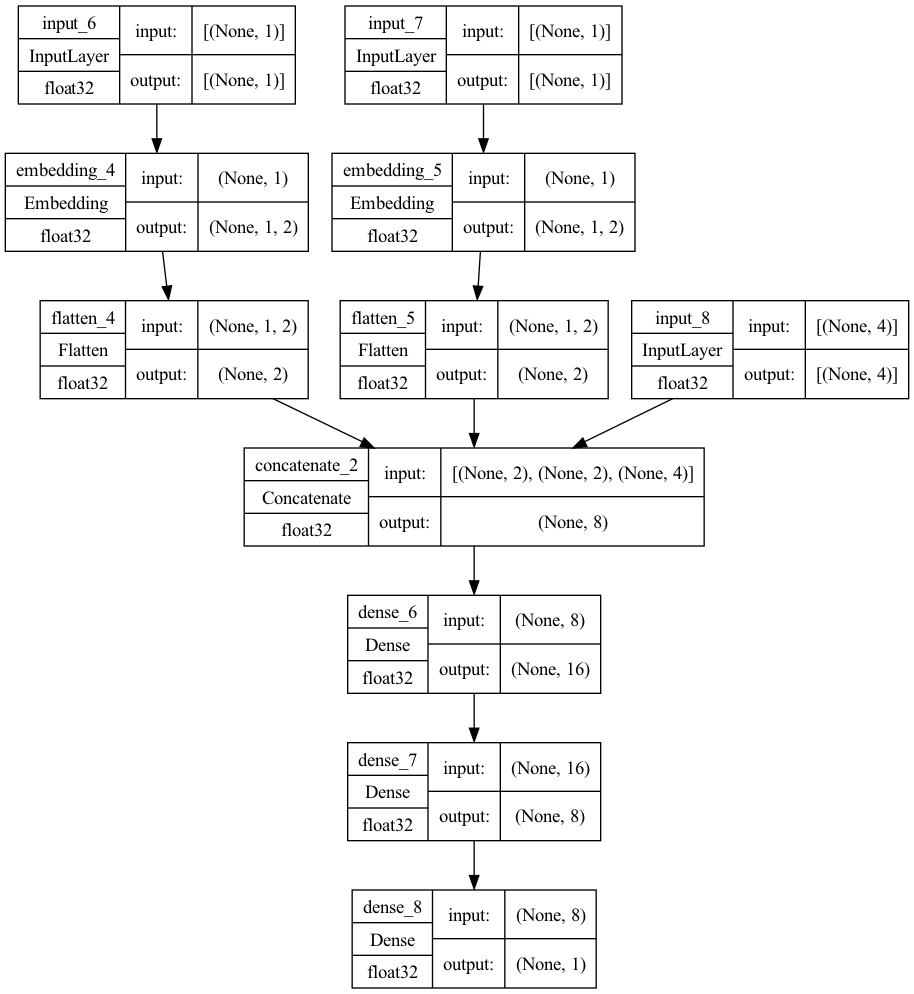

In [22]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

What did we do here? 

1. We define two `Input` layers for the categorical features: `cat_input_1` for 'Sex' and `cat_input_2` for 'Embarked'. Both have `shape=(1,)`, indicating that we expect one input for each sample.
2. We use an `Embedding` layer to convert the categorical inputs into dense vectors. For 'Sex', we have two unique categories, so we set `input_dim=2` and `output_dim=2`. For 'Embarked', we have four unique categories, so we set `input_dim=4` and `output_dim=2`.
3. The embedding outputs are then flattened using the `Flatten` layer, resulting in one-dimensional vectors: `flat_embed_1` for 'Sex' and `flat_embed_2` for 'Embarked'.
4. We define an `Input` layer for the numerical features (`num_input`) with `shape=(4,)`, indicating that we expect four numerical inputs for each sample ('Pclass', 'Age', 'Fare', 'Parch').
5. We concatenate the flattened embedding outputs (`flat_embed_1`, `flat_embed_2`) with the numerical inputs (`num_input`) using the `Concatenate` layer.
6. We pass the concatenated features through dense layers to perform classification. In this example, we have two hidden layers with 64 and 32 units, respectively, and ReLU activation functions. The final output layer uses a sigmoid activation function for binary classification.
7. Finally, we create the model by specifying the input and output layers with `Model(inputs=[cat_input_1, cat_input_2, num_input], outputs=outputs)`.


In [25]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])

# Train the model
model.fit([X_train['Sex'], X_train['Embarked'], X_train[['Pclass', 'Age', 'Fare', 'Parch']]], y_train,
          batch_size=32,
          epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate([X_test['Sex'], X_test['Embarked'], X_test[['Pclass', 'Age', 'Fare','Parch']]], y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
23/23 [==============================] - 0s 600us/step - loss: 0.4732 - accuracy: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 0s 612us/step - loss: 0.4662 - accuracy: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 0s 606us/step - loss: 0.4621 - accuracy: 0.0000e+00
Epoch 4/10
23/23 [==============================] - 0s 599us/step - loss: 0.4594 - accuracy: 0.0000e+00
Epoch 5/10
23/23 [==============================] - 0s 629us/step - loss: 0.4555 - accuracy: 0.0000e+00
Epoch 6/10
23/23 [==============================] - 0s 553us/step - loss: 0.4546 - accuracy: 0.0000e+00
Epoch 7/10
23/23 [==============================] - 0s 490us/step - loss: 0.4525 - accuracy: 0.0000e+00
Epoch 8/10
23/23 [==============================] - 0s 486us/step - loss: 0.4499 - accuracy: 0.0000e+00
Epoch 9/10
23/23 [==============================] - 0s 506us/step - loss: 0.4488 - accuracy: 0.0000e+00
Epoch 10/10
6/6 [==============================] - 0s 638us/step

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences



import numpy as np
import pandas as pd

# Create a small textual dataset
data = pd.DataFrame({
    'Text1': ['Hello', 'How are you', 'I am fine'],
    'Text2': ['Goodbye', 'See you later', 'Take care'],
    'Label': ['Greeting', 'Greeting', 'Farewell']
})

X = data[['Text1', 'Text2']].copy()
y = data['Label'].copy()

In [13]:
# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and convert textual features to numerical sequences
max_words = 1000  # Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X['Text1'])
X_text1 = tokenizer.texts_to_sequences(X['Text1'])
X_text2 = tokenizer.texts_to_sequences(X['Text2'])

In [13]:
# Pad sequences to have the same length
max_seq_length = max(max(len(seq) for seq in X_text1), max(len(seq) for seq in X_text2))
X_text1 = pad_sequences(X_text1, maxlen=max_seq_length)
X_text2 = pad_sequences(X_text2, maxlen=max_seq_length)

In [13]:
# Split the data into training and testing sets
X_train_text1, X_test_text1, X_train_text2, X_test_text2, y_train, y_test = train_test_split(
    X_text1, X_text2, y, test_size=0.2, random_state=42
)

# Define the graph model
# Input layers for textual features
text_input_1 = Input(shape=(max_seq_length,))
text_input_2 = Input(shape=(max_seq_length,))

In [13]:
# Embedding layers for textual features
embedding_dim = 16
embedding_1 = Embedding(input_dim=max_words, output_dim=embedding_dim)(text_input_1)
embedding_2 = Embedding(input_dim=max_words, output_dim=embedding_dim)(text_input_2)

# Flatten the embeddings
flatten_1 = Flatten()(embedding_1)
flatten_2 = Flatten()(embedding_2)

# Concatenate flattened embeddings with dense layers for classification
concatenated = Concatenate()([flatten_1, flatten_2])
x = Dense(64, activation='relu')(concatenated)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [13]:
# Create the model
model = Model(inputs=[text_input_1, text_input_2], outputs=output)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 3, 16)        16000       ['input_4[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 3, 16)        16000       ['input_5[0][0]']                
                                                                                            

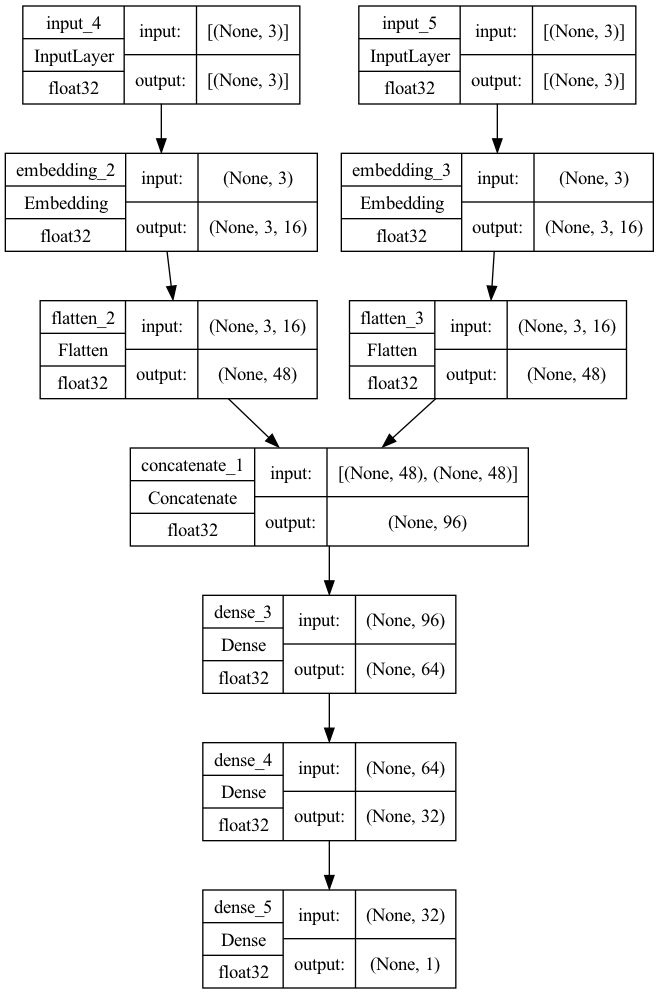

In [14]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=[Accuracy()])

# Train the model
model.fit([X_train_text1, X_train_text2], y_train,
          batch_size=32,
          epochs=10,
          validation_data=([X_test_text1, X_test_text2], y_test))

# Evaluate the model
loss, accuracy = model.evaluate([X_test_text1, X_test_text2], y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
1/1 [==============================] - 0s 292ms/step - loss: 0.6946 - accuracy: 0.0000e+00 - val_loss: 0.7089 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6876 - accuracy: 0.0000e+00 - val_loss: 0.7110 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6822 - accuracy: 0.0000e+00 - val_loss: 0.7129 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6767 - accuracy: 0.0000e+00 - val_loss: 0.7150 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6715 - accuracy: 0.0000e+00 - val_loss: 0.7178 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6669 - accuracy: 0.0000e+00 - val_loss: 0.7209 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6624 - accuracy: 0.0000e+00 - val_loss: 0.724